<a href="https://colab.research.google.com/github/Koftarik/Data_Processing_and_Machine_Learning/blob/main/1_2_object_detecting_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо разработать программу, обнаруживающую заданный однородный объект на контрастном цветном фоне. Необходимо провести кластеризацию исходного изображения, на котором есть заданный объект и подобрать границы цвета, задающего этот объект. Далее необходимо найти заданный объект на 2-3 новых изображениях также на контрастном фоне.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from sklearn.cluster import KMeans

In [ ]:
def clustering(pix):
  data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x in range(pix.shape[0]) for y in range(pix.shape[1])]

  db=KMeans(n_clusters=30)
  db_clusters=db.fit_predict(data)

  for p, c in zip(data, db_clusters):
      pix[p[0], p[1]] = (db.cluster_centers_[c, 2],
                         db.cluster_centers_[c, 3],
                         db.cluster_centers_[c, 4])

  plt.imshow(pix)

  return (db_clusters, db.cluster_centers_)

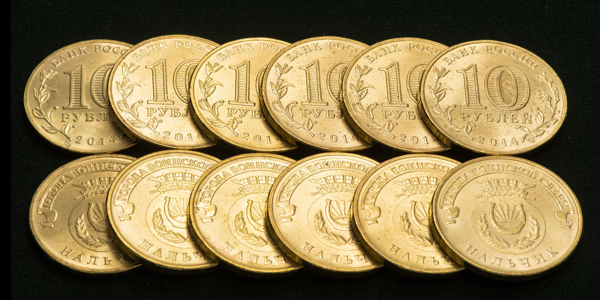

In [ ]:
img1 = Image.open('dengi1.jpg')
img1 = img1.resize((600, 300))
img1

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


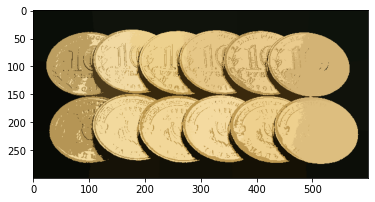

In [ ]:
pix = np.array(img1)
clusters_1, centers_1 = clustering(pix)

In [ ]:
pix[25,25]

array([10, 14,  8], dtype=uint8)

In [ ]:
pix[75,50], pix[75,140], pix[75,300], pix[100,470], pix[230,75]

(array([188, 158,  96], dtype=uint8),
 array([241, 217, 162], dtype=uint8),
 array([230, 199, 135], dtype=uint8),
 array([211, 179, 117], dtype=uint8),
 array([181, 149,  85], dtype=uint8))

Выбираем цвет.

In [ ]:
def mcl(img, clusters, centers):
  pix = np.array(img)
  data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x in range(pix.shape[0]) for y in range(pix.shape[1])]
  near = []
  for i, c in enumerate(centers):
      if (abs(c[2] - 189) + abs(c[3] - 159) + abs(c[4] - 98) < 65
      or abs(c[2] - 240) + abs(c[3] - 214) + abs(c[4] - 154) < 45
      or abs(c[2] - 225) + abs(c[3] - 194) + abs(c[4] - 129) < 45
      or abs(c[2] - 212) + abs(c[3] - 180) + abs(c[4] - 118) < 45
      or abs(c[2] - 151) + abs(c[3] - 117) + abs(c[4] - 71) < 45) :
        near.append(i)

  pix_ = np.zeros(pix.shape, np.uint8)
  p_c = img.load()
  gray = np.array([[int((p_c[x, y][0] + p_c[x, y][1] + p_c[x, y][2]) / 3) for x in range(img.size[0])] for y in range(img.size[1])])

  for p, c in zip(data, clusters):
    if c in near:
      pix_[p[0], p[1]] = (int(pix[p[0], p[1]][0]),
                          int(pix[p[0], p[1]][1]),
                          int(pix[p[0], p[1]][2]))
    else:
      pix_[p[0], p[1]] = (int(gray[p[0], p[1]]),
                          int(gray[p[0], p[1]]),
                          int(gray[p[0], p[1]]))

  return pix_

Вывод изображения



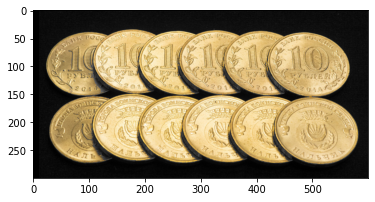

In [ ]:
plt.imshow(mcl(img1, clusters_1, centers_1))

In [ ]:
pix[25,25]

array([10, 14,  8], dtype=uint8)

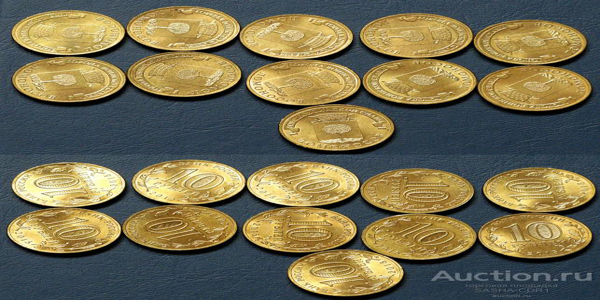

In [ ]:
img2 = Image.open('dg10.jpg')
img2 = img2.resize((600, 300))
img2

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


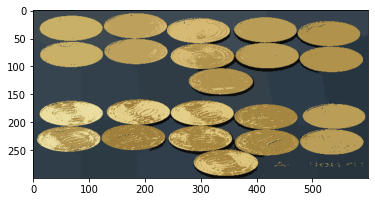

In [ ]:
pix2 = np.array(img2)
clusters_2, centers_2 = clustering(pix2)

In [ ]:
pix[250,500]

array([221, 190, 127], dtype=uint8)

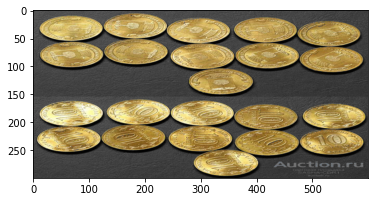

In [ ]:
plt.imshow(mcl(img2, clusters_2, centers_2))

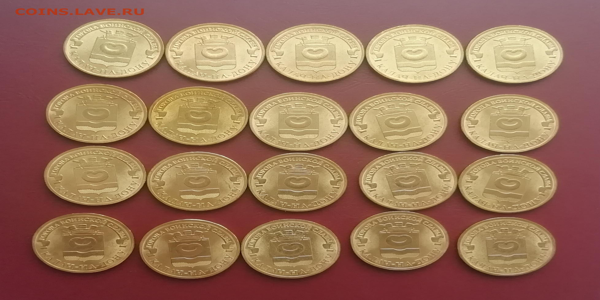

In [ ]:
img3 = Image.open('dengi9.jpg')
img3 = img3.resize((600, 300))
img3

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


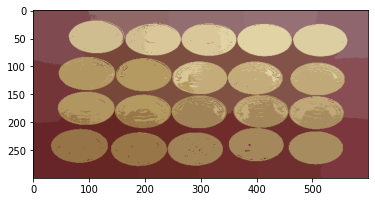

In [ ]:
pix3 = np.array(img3)
clusters_3, centers_3 = clustering(pix3)

In [ ]:
pix3[250,50], pix3[10,550]

(array([151, 116,  71], dtype=uint8), array([143, 102, 109], dtype=uint8))

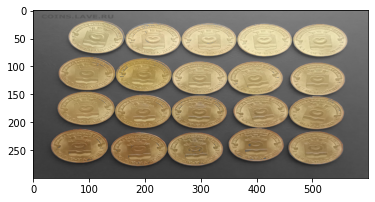

In [ ]:
plt.imshow(mcl(img3, clusters_3, centers_3))